# CPV301 WORKSHOP 2

Nhóm 5

In [11]:
import cv2
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from PIL import Image, ImageFilter 

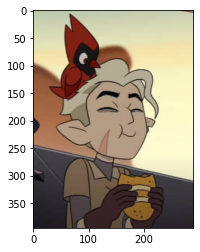

In [12]:
img = cv2.cvtColor(cv2.imread('image_1.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

## **Function 1**: color balance, to perform this function, the user needs to enter the necessary parameters to perform color balance. (can use the slider to represent it visually)

In [13]:
@interact(r=(0,255), g=(0,255),b=(0,255))
def ab(r=0,g=0,b=0):
    rr,gg,bb = cv2.split(img)
    rr += r
    gg += g
    bb += b
    plt.imshow(cv2.merge((rr,gg,bb)))

interactive(children=(IntSlider(value=0, description='r', max=255), IntSlider(value=0, description='g', max=25…

## Function 2: Show histogram and enter the necessary information to perform histogram equalization

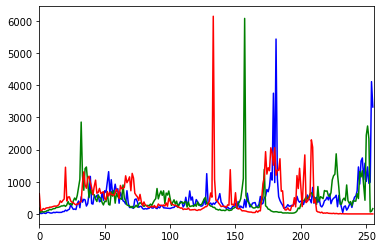

In [14]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

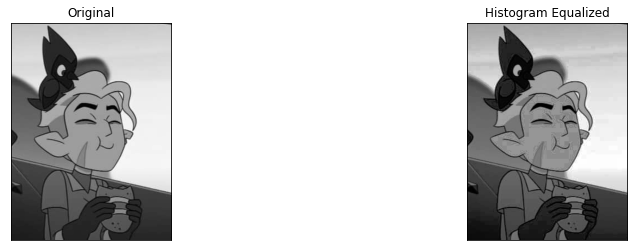

In [15]:
tfa=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(tfa)
plt.figure().set_figwidth(15)
plt.subplot(121),plt.imshow(tfa,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(equ,cmap='gray'),plt.title('Histogram Equalized')
plt.xticks([]), plt.yticks([])
plt.show()

## Function 3: Median filter to remove noise (salt and pepper noise)

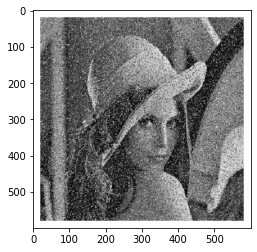

In [16]:
img_with_noise = cv2.cvtColor(cv2.imread('salt_pepper.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img_with_noise)

In [17]:
@interact(k=(1,30,2))
def median(k=1):
    filtered_img = cv2.medianBlur(img_with_noise, k)
    plt.imshow(filtered_img)

interactive(children=(IntSlider(value=1, description='k', max=30, min=1, step=2), Output()), _dom_classes=('wi…

## Function 4: implement the Mean filter to remove noise in image (salt and pepper noise)

In [18]:
@interact(k=(1,30,2))
def median(k=1):
    mean_img = cv2.blur(img_with_noise, (k,k))
    plt.imshow(mean_img)

interactive(children=(IntSlider(value=1, description='k', max=30, min=1, step=2), Output()), _dom_classes=('wi…

# **Function** 5: implement Gaussian smoothing to perform image smoothing.

In [19]:
@interact(k=(1,30,2))
def median(k=1):
    gaussian = cv2.GaussianBlur(img_with_noise, (k,k),0)
    plt.imshow(gaussian)

interactive(children=(IntSlider(value=1, description='k', max=30, min=1, step=2), Output()), _dom_classes=('wi…